<a href="https://colab.research.google.com/github/LazaroR-u/Thesis_Data_Analysis_CMS_CERN/blob/main/2_Analysis_of_Label_Change_History_RPCs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the currents in the RPCs of the CMS detector at CERN.

By **Lázaro R. Díaz Lievano**

**B.Sc. Physics Student, Autonomous University of Puebla.**

lazaro.raul.diaz.lievano@cern.ch


Within this notebook, we initiate by crafting a **new mapping dataframe** sourced from the label change history file. Subsequently, we conduct a comparative analysis against the existing Mapse mapping dataframe.

Following this, we enhance the new mapping dataframe by appending suffixes to the duplicate DPIDs, **enabling the mapping of both chamber names** using our updated mapping function.

We then proceed to **apply both map functions**: the Mapse mapping function and our new mapping function **to the currents data**, facilitating a thorough comparative study between the two.

Lastly, we meticulously scrutinize the differences by **comparing the histograms** derived from these two sets of mapped current data.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

import numpy as np

# Data processing

## Load data

The next data has records when a change in the labels of RPCs was performed. This data was provided by Anton Dimitrov, CMS RPC Technical Coordinator at CERN.


In [76]:
# Mapping dataframe used by Mapse
df_mapping = pd.read_csv('https://raw.githubusercontent.com/Mapse/RPC_Currents/main/RPC_Chamber_HV_Map.csv')

df_mapping

,DPID2,CHAMBER_NAME
0,315,W+2_RB1in_S01
1,316,W+2_RB1out_S01
2,317,W+2_RB2in_S01
3,318,W+2_RB2out_S01
4,319,W+2_RB3-_S01
...,...,...
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11
1048,216701,RE-1_R2_CH18


In [77]:
history = pd.read_csv("https://raw.githubusercontent.com/LazaroR-u/Thesis_Data_Analysis_CMS_CERN/main/CHAMBER_DPID_MAP_v9.csv")
history

,Record_ID,Chamber_ID,Chamber_Name,Region,Wheel_Disk,Station_Ring,Sector,Position,DPID_Change_Date_FROM,DPID_Change_Date_TO,HV DPID,GAS DPID1,GAS DPID2,Roll_ID1,Roll_ID2,Roll_ID3,TEMPERATURE_ID,FOS_ID
0,1,447821,W0/S01/RB1in,Barrel,0,1,1,in,07-MAR-09 04.28.47.501000000 PM,NaN,3033,16310,NaN,NaN,NaN,NaN,9521.0,NaN
1,2,447822,W0/S01/RB1out,Barrel,0,1,1,out,07-MAR-09 04.28.47.501000000 PM,NaN,6409,16310,NaN,NaN,NaN,NaN,9522.0,NaN
2,3,447823,W0/S01/RB2in,Barrel,0,2,1,in,07-MAR-09 04.28.47.501000000 PM,NaN,6411,16311,NaN,NaN,NaN,NaN,9520.0,NaN
3,4,447824,W0/S01/RB2out,Barrel,0,2,1,out,07-MAR-09 04.28.47.501000000 PM,NaN,6413,16311,NaN,NaN,NaN,NaN,9520.0,NaN
4,5,447825,W0/S01/RB3-,Barrel,0,3,1,-,07-MAR-09 04.28.47.501000000 PM,NaN,6415,16312,NaN,NaN,NaN,NaN,9519.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,2612,448176,RE-4/3/32,Endcap,-4,3,32,NaN,10-MAY-22 02.11.16.501000000 PM,NaN,203861,448737,448736.0,NaN,NaN,NaN,NaN,231440.0
2612,2613,448177,RE-4/3/33,Endcap,-4,3,33,NaN,10-MAY-22 02.11.16.501000000 PM,NaN,203862,448731,448738.0,NaN,NaN,NaN,NaN,231441.0
2613,2614,448178,RE-4/3/34,Endcap,-4,3,34,NaN,10-MAY-22 02.11.16.501000000 PM,NaN,203863,448731,448738.0,NaN,NaN,NaN,NaN,231442.0
2614,2615,448179,RE-4/3/35,Endcap,-4,3,35,NaN,10-MAY-22 02.11.16.501000000 PM,NaN,203864,448793,448794.0,NaN,NaN,NaN,NaN,231443.0


## Duplicate entries

In [78]:
df_mapping2_dup = history[history["Chamber_ID"].duplicated(keep=False)]
df_mapping2_dup

,Record_ID,Chamber_ID,Chamber_Name,Region,Wheel_Disk,Station_Ring,Sector,Position,DPID_Change_Date_FROM,DPID_Change_Date_TO,HV DPID,GAS DPID1,GAS DPID2,Roll_ID1,Roll_ID2,Roll_ID3,TEMPERATURE_ID,FOS_ID
0,1,447821,W0/S01/RB1in,Barrel,0,1,1,in,07-MAR-09 04.28.47.501000000 PM,NaN,3033,16310,NaN,NaN,NaN,NaN,9521.0,NaN
1,2,447822,W0/S01/RB1out,Barrel,0,1,1,out,07-MAR-09 04.28.47.501000000 PM,NaN,6409,16310,NaN,NaN,NaN,NaN,9522.0,NaN
2,3,447823,W0/S01/RB2in,Barrel,0,2,1,in,07-MAR-09 04.28.47.501000000 PM,NaN,6411,16311,NaN,NaN,NaN,NaN,9520.0,NaN
3,4,447824,W0/S01/RB2out,Barrel,0,2,1,out,07-MAR-09 04.28.47.501000000 PM,NaN,6413,16311,NaN,NaN,NaN,NaN,9520.0,NaN
4,5,447825,W0/S01/RB3-,Barrel,0,3,1,-,07-MAR-09 04.28.47.501000000 PM,NaN,6415,16312,NaN,NaN,NaN,NaN,9519.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,2612,448176,RE-4/3/32,Endcap,-4,3,32,NaN,10-MAY-22 02.11.16.501000000 PM,NaN,203861,448737,448736.0,NaN,NaN,NaN,NaN,231440.0
2612,2613,448177,RE-4/3/33,Endcap,-4,3,33,NaN,10-MAY-22 02.11.16.501000000 PM,NaN,203862,448731,448738.0,NaN,NaN,NaN,NaN,231441.0
2613,2614,448178,RE-4/3/34,Endcap,-4,3,34,NaN,10-MAY-22 02.11.16.501000000 PM,NaN,203863,448731,448738.0,NaN,NaN,NaN,NaN,231442.0
2614,2615,448179,RE-4/3/35,Endcap,-4,3,35,NaN,10-MAY-22 02.11.16.501000000 PM,NaN,203864,448793,448794.0,NaN,NaN,NaN,NaN,231443.0


In [79]:
#example of change history for the RPC RE+2/3/06
df_mapping2_dup[df_mapping2_dup["Chamber_Name"]=="RE+2/3/06"].iloc[:,[0,1,2,8,9,10,11,12]]

,Record_ID,Chamber_ID,Chamber_Name,DPID_Change_Date_FROM,DPID_Change_Date_TO,HV DPID,GAS DPID1,GAS DPID2
593,594,448509,RE+2/3/06,07-MAR-09 04.28.47.501000000 PM,26-AUG-14 01.11.44.395999999 PM,142842,117843,117844.0
1103,1104,448509,RE+2/3/06,26-AUG-14 01.11.44.396000000 PM,03-NOV-14 11.56.03.906999999 AM,142849,117843,117844.0
1241,1242,448509,RE+2/3/06,03-NOV-14 11.56.03.907000000 AM,NaN,142838,117843,117844.0
2153,2154,448509,RE+2/3/06,10-MAY-22 02.11.16.501000000 PM,NaN,142838,449131,449132.0


For example, in the chamber with name RE+2/3/06 has changes in its labels in 4 different dates,


*  **07-MAR-09**

First record.

*   **26-AUG-14**

change the HV DPID from 142842 to 142849


*   **03-NOV-14**

change the HV DPID from 142849 to 142838


*   **10-MAY-22**

change the GAS DPID1 from 117843 to 449131 and

 GAS DPID2 from 117844.0 to 449132.0






In [80]:
len(history["HV DPID"].unique()), len(history["Chamber_Name"].unique())

(779, 1056)

There are 1056 unique chambers in history

In [81]:
df_mapping[df_mapping["CHAMBER_NAME"]=="RE+2_R3_CH06"]

,DPID2,CHAMBER_NAME
506,142838,RE+2_R3_CH06


We see the case for the chamber RE+2_R3_CH06 and found that its DPID is 142838, this corresponds with the last HV DPID recorded in the history dataframe.


## Analyzing the history dataframe

The file provided by Anton has entries of the history labels changes for each chamber in the CMS detector of the LHC of CERN.

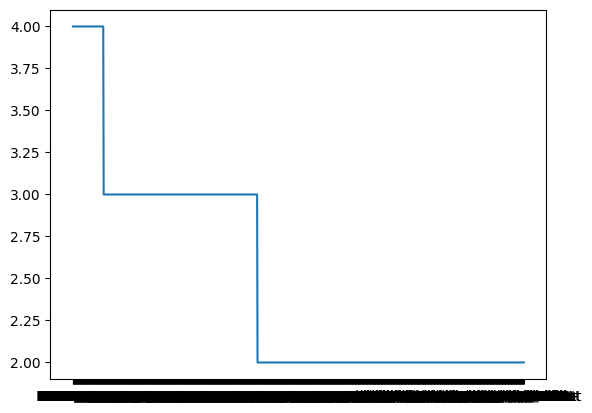

In [82]:
import matplotlib.pyplot as plt

plt.plot(df_mapping2_dup["Chamber_Name"].value_counts().index, df_mapping2_dup["Chamber_Name"].value_counts())

We see that there are 2,3 or 4 changes in the labels of each chamber.

In [83]:
df_mapping2_dup["Chamber_Name"].value_counts().index

Index(['RE+1/3/06', 'RE+2/3/06', 'RE+2/3/08', 'RE+2/3/09', 'RE+2/3/10',
       'RE+1/2/29', 'RE+1/2/30', 'RE+1/2/31', 'RE+1/2/32', 'RE+1/2/33',
       ...
       'W+1/S04/RB4+', 'W+1/S04/RB4++', 'W+1/S05/RB1in', 'W+1/S05/RB1out',
       'W+1/S05/RB2in', 'W+1/S05/RB2out', 'W+1/S05/RB3-', 'W+1/S05/RB3+',
       'W+1/S05/RB4-', 'RE-4/3/36'],
      dtype='object', length=1056)

1056 unique chambers in the history file

In [84]:
df_mapping_dup = df_mapping[df_mapping["DPID2"].duplicated(keep=False)]
df_mapping_dup

,DPID2,CHAMBER_NAME
481,142824,RE+2_R3_CH02
482,142824,RE+1_R3_CH29
483,142825,RE+1_R3_CH31
484,142825,RE+1_R2_CH29
485,142826,RE+2_R3_CH03
...,...,...
1042,216670,RE+3_R2_CH33
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11


In [85]:
df_mapping[df_mapping["DPID2"].isin(history["HV DPID"])]

,DPID2,CHAMBER_NAME
0,315,W+2_RB1in_S01
1,316,W+2_RB1out_S01
2,317,W+2_RB2in_S01
3,318,W+2_RB2out_S01
4,319,W+2_RB3-_S01
...,...,...
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11
1048,216701,RE-1_R2_CH18


The history file contains all the chambers considered in the Mapse mapping dataframe but we have 6 more chamber names in the history file.

## Creating the all chambers included mapping dataframe

We create a function that returns the last HV DPID for each chamber.


In [86]:
df_unique2 =pd.DataFrame(pd.Series(history["Chamber_Name"].unique()), columns=["Chamber_name"])

def convert_dpid_name(df_data, df_mapping):

    # Take df colums to numpy array
    k = history['HV DPID'].to_numpy()
    v = history['Chamber_Name'].to_numpy()

    # Convert both arrays to a dict.
    dicmap =  dict(zip(v, k))

    # Takes the chamber names from the mapping file and add it in a new column
    # to the data dataframe
    df_data['DPID'] = df_data['Chamber_name'].map(dicmap)

    df_data_mapped = df_data

    return df_data_mapped

new_df_mapping = convert_dpid_name(df_unique2, history)

In [87]:
new_df_mapping

,Chamber_name,DPID
0,W0/S01/RB1in,3033
1,W0/S01/RB1out,6409
2,W0/S01/RB2in,6411
3,W0/S01/RB2out,6413
4,W0/S01/RB3-,6415
...,...,...
1051,RE-4/3/32,203861
1052,RE-4/3/33,203862
1053,RE-4/3/34,203863
1054,RE-4/3/35,203864


Now, we have a new mapping dataframe that includes all the chambers of the CMS.

### comparing the 2023 HV DPID with the 2014 DPID

Here, we compare the last HV DPID recorded by each chamber with its penultimate HV DPID. This is important because the data we are analyzing spans across the years 2018, 2022, and 2023. Therefore, we need to ensure that we correctly map the chamber names with the DPIDs from the 2018 data. For subsequent years, we anticipate that the last HV DPID recorded in 2022 aligns with the currents data of 2022 and 2023.


In [88]:
#history file where the HV DPID from 2022 was removed
history14 = history[~(history["DPID_Change_Date_FROM"] == "10-MAY-22 02.11.16.501000000 PM")]

df_unique2 =pd.DataFrame(pd.Series(history["Chamber_Name"].unique()), columns=["Chamber_name"])

df_mapping14 = convert_dpid_name(df_unique2, history14)

df_mapping14

,Chamber_name,DPID
0,W0/S01/RB1in,3033
1,W0/S01/RB1out,6409
2,W0/S01/RB2in,6411
3,W0/S01/RB2out,6413
4,W0/S01/RB3-,6415
...,...,...
1051,RE-4/3/32,203861
1052,RE-4/3/33,203862
1053,RE-4/3/34,203863
1054,RE-4/3/35,203864


In [89]:
coincidencias=0
for element in new_df_mapping["DPID"]:
  criterio = new_df_mapping[new_df_mapping["DPID"]==element].iloc[0,0]== df_mapping14[df_mapping14["DPID"]==element].iloc[0,0]
  coincidencias=coincidencias+criterio

coincidencias

1056

In effect, the chamber names and the DPIDs match completely. This means that we can use the 2022 HV DPID to map data recorded later than 2014.

## Transforming the new mapping dataframe



In [90]:
# we just sorted the new mapping dataframe
df_new_mapping = df_unique2
df_new_mapping = df_new_mapping.sort_values("DPID")
df_new_mapping = df_new_mapping.reset_index(inplace = False)
df_new_mapping = df_new_mapping.drop(columns = "index")
df_new_mapping

,Chamber_name,DPID
0,W+2/S01/RB1in,315
1,W+2/S01/RB1out,316
2,W+2/S01/RB2in,317
3,W+2/S01/RB2out,318
4,W+2/S01/RB3-,319
...,...,...
1051,RE-1/3/04,216689
1052,RE-1/3/10,216689
1053,RE-1/2/18,216701
1054,RE-2/2/11,216701


We change the format of the chamber names in the endcaps to compare the chamber names between the new mapping dataframe and the Mapse mapping dataframe.

 We transform the strings from "RE+2/3/10" to "RE+2_R3_CH10"


In [91]:
import pandas as pd
import re

def transform_strings(input_str):
    pattern = r"RE[+-](\d+)/(\d+)/(\d+)"
    match = re.match(pattern, input_str)

    if match:
        a, b, c = match.groups()
        sign = input_str[2]
        new_str = f"RE{sign}{a}_R{b}_CH{c}"
        return new_str
    else:
        return input_str.replace("/", "_")


# Aplicar la función a la columna "Chamber_name"
new_df_mapping["Chamber_name"] = new_df_mapping["Chamber_name"].apply(transform_strings)

# Mostrar el DataFrame con las cadenas transformadas
print(new_df_mapping["Chamber_name"])

0        W0_S01_RB1in
1       W0_S01_RB1out
2        W0_S01_RB2in
3       W0_S01_RB2out
4         W0_S01_RB3-
            ...      
1051     RE-4_R3_CH32
1052     RE-4_R3_CH33
1053     RE-4_R3_CH34
1054     RE-4_R3_CH35
1055     RE-4_R3_CH36
Name: Chamber_name, Length: 1056, dtype: object


Now, the two mapping dataframes have the same format

In [92]:
df_mapping

,DPID2,CHAMBER_NAME
0,315,W+2_RB1in_S01
1,316,W+2_RB1out_S01
2,317,W+2_RB2in_S01
3,318,W+2_RB2out_S01
4,319,W+2_RB3-_S01
...,...,...
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11
1048,216701,RE-1_R2_CH18


In [93]:
import pandas as pd
import re

def transform_strings(input_str):
    pattern = r"RE[+-](\d+)/(\d+)/(\d+)"
    match = re.match(pattern, input_str)

    if match:
        a, b, c = match.groups()
        sign = input_str[2]
        new_str = f"RE{sign}{a}_R{b}_CH{c}"
        return new_str
    else:
        return input_str.replace("/", "_")


new_df_mapping["Chamber_name"] = new_df_mapping["Chamber_name"].apply(transform_strings)

print(new_df_mapping["Chamber_name"])


0        W0_S01_RB1in
1       W0_S01_RB1out
2        W0_S01_RB2in
3       W0_S01_RB2out
4         W0_S01_RB3-
            ...      
1051     RE-4_R3_CH32
1052     RE-4_R3_CH33
1053     RE-4_R3_CH34
1054     RE-4_R3_CH35
1055     RE-4_R3_CH36
Name: Chamber_name, Length: 1056, dtype: object


In [94]:
df_mapping[df_mapping["CHAMBER_NAME"].isin(new_df_mapping['Chamber_name'])]

,DPID2,CHAMBER_NAME
480,142823,RE+1_R3_CH33
481,142824,RE+2_R3_CH02
482,142824,RE+1_R3_CH29
483,142825,RE+1_R3_CH31
484,142825,RE+1_R2_CH29
...,...,...
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11
1048,216701,RE-1_R2_CH18


Change the place of "_S01" from middle to the end of the string.
Cambio de lugar de la parte "_S01" de en medio hasta el final del string

In [95]:
import pandas as pd

def move_substring_to_end(input_str, substring_to_move):
    if substring_to_move in input_str:
        parts = input_str.split(substring_to_move)
        return parts[0] + parts[1] + substring_to_move
    else:
        return input_str

for i in range(1, 37):
    substring = f"_S{i:02d}"
    new_df_mapping["Chamber_name"] = new_df_mapping["Chamber_name"].apply(move_substring_to_end, args=(substring,))

print(new_df_mapping)


       Chamber_name    DPID
0      W0_RB1in_S01    3033
1     W0_RB1out_S01    6409
2      W0_RB2in_S01    6411
3     W0_RB2out_S01    6413
4       W0_RB3-_S01    6415
...             ...     ...
1051   RE-4_R3_CH32  203861
1052   RE-4_R3_CH33  203862
1053   RE-4_R3_CH34  203863
1054   RE-4_R3_CH35  203864
1055   RE-4_R3_CH36  203865

[1056 rows x 2 columns]


In [96]:
new_df_mapping

,Chamber_name,DPID
0,W0_RB1in_S01,3033
1,W0_RB1out_S01,6409
2,W0_RB2in_S01,6411
3,W0_RB2out_S01,6413
4,W0_RB3-_S01,6415
...,...,...
1051,RE-4_R3_CH32,203861
1052,RE-4_R3_CH33,203862
1053,RE-4_R3_CH34,203863
1054,RE-4_R3_CH35,203864


In [97]:
df_mapping[df_mapping["CHAMBER_NAME"].isin(new_df_mapping['Chamber_name'])]

,DPID2,CHAMBER_NAME
0,315,W+2_RB1in_S01
1,316,W+2_RB1out_S01
2,317,W+2_RB2in_S01
3,318,W+2_RB2out_S01
4,319,W+2_RB3-_S01
...,...,...
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11
1048,216701,RE-1_R2_CH18


In [98]:
new_df_mapping = new_df_mapping.sort_values(by="DPID")
new_df_mapping

,Chamber_name,DPID
384,W+2_RB1in_S01,315
385,W+2_RB1out_S01,316
386,W+2_RB2in_S01,317
387,W+2_RB2out_S01,318
388,W+2_RB3-_S01,319
...,...,...
807,RE-1_R3_CH04,216689
813,RE-1_R3_CH10,216689
785,RE-1_R2_CH18,216701
850,RE-2_R2_CH11,216701


## Comparing the two mapping dataframes

There are 1050 matches between the df_mapping and the new mapping dataframe.


In [99]:
new_df_mapping

,Chamber_name,DPID
384,W+2_RB1in_S01,315
385,W+2_RB1out_S01,316
386,W+2_RB2in_S01,317
387,W+2_RB2out_S01,318
388,W+2_RB3-_S01,319
...,...,...
807,RE-1_R3_CH04,216689
813,RE-1_R3_CH10,216689
785,RE-1_R2_CH18,216701
850,RE-2_R2_CH11,216701


In [100]:
df_mapping

,DPID2,CHAMBER_NAME
0,315,W+2_RB1in_S01
1,316,W+2_RB1out_S01
2,317,W+2_RB2in_S01
3,318,W+2_RB2out_S01
4,319,W+2_RB3-_S01
...,...,...
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11
1048,216701,RE-1_R2_CH18


In [101]:
new_df_mapping[new_df_mapping["DPID"]==142838].iloc[0,0]

'RE+2_R3_CH06'

In [102]:
coincidencias=0
for element in df_mapping["DPID2"]:
  criterio = new_df_mapping[new_df_mapping["DPID"]==element].iloc[0,1]== df_mapping[df_mapping["DPID2"]==element].iloc[0,0]
  coincidencias=coincidencias+criterio

coincidencias

1050

The DPID matches if we compare each chamber name.

In [103]:
coincidencias=0
for element in df_mapping["CHAMBER_NAME"]:
  criterio = new_df_mapping[new_df_mapping["Chamber_name"]==str(element)].iloc[0,1]== df_mapping[df_mapping["CHAMBER_NAME"]==str(element)].iloc[0,0]
  coincidencias=coincidencias+criterio

coincidencias

1050

The two dataframe have 1050 matches, who is the total number of chambers in the Mapse mapping dataframe. So, the new mapping dataframe includes all the DPIDs and its corresponding chamber names considered in the Mapse mapping dataframe.

In [104]:
new_df_mapping[~new_df_mapping["Chamber_name"].isin(df_mapping['CHAMBER_NAME'])]

,Chamber_name,DPID
1027,RE-4_R3_CH08,203855
991,RE-4_R2_CH08,203855
1030,RE-4_R3_CH11,203866
994,RE-4_R2_CH11,203866
1040,RE-4_R3_CH21,203876
1004,RE-4_R2_CH21,203876


We found the six missing chambers that dont appears in the Mapse mapping dataframe.

## duplictate DPIDs in new_df_mapping

In [105]:
new_df_mapping_dup = new_df_mapping[new_df_mapping["DPID"].duplicated(keep=False)]
new_df_mapping_dup

,Chamber_name,DPID
544,RE+1_R3_CH29,142824
589,RE+2_R3_CH02,142824
546,RE+1_R3_CH31,142825
508,RE+1_R2_CH29,142825
550,RE+1_R3_CH35,142826
...,...,...
656,RE+3_R2_CH33,216670
807,RE-1_R3_CH04,216689
813,RE-1_R3_CH10,216689
785,RE-1_R2_CH18,216701


In [106]:
len(new_df_mapping["DPID"].unique())

773

In [107]:
df_mapping_dup = df_mapping[df_mapping["DPID2"].duplicated(keep=False)]
df_mapping_dup

,DPID2,CHAMBER_NAME
481,142824,RE+2_R3_CH02
482,142824,RE+1_R3_CH29
483,142825,RE+1_R3_CH31
484,142825,RE+1_R2_CH29
485,142826,RE+2_R3_CH03
...,...,...
1042,216670,RE+3_R2_CH33
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11


In [108]:
len(df_mapping_dup["DPID2"].unique())

280

In [109]:
len(new_df_mapping["DPID"].unique()), len(new_df_mapping["Chamber_name"].unique())

(773, 1056)

In [110]:
len(df_mapping["DPID2"].unique()), len(df_mapping["CHAMBER_NAME"].unique())

(770, 1050)

In [111]:
new_df_mapping_dup[~new_df_mapping_dup["DPID"].isin(df_mapping_dup["DPID2"])]

,Chamber_name,DPID
1027,RE-4_R3_CH08,203855
991,RE-4_R2_CH08,203855
1030,RE-4_R3_CH11,203866
994,RE-4_R2_CH11,203866
1040,RE-4_R3_CH21,203876
1004,RE-4_R2_CH21,203876


**At the end, we find that there are 1056 unique cameras recorded, of which we have 773 unique HV DPIDs.**

**The difference with df_mapping is that new_df_mapping includes the 6 missing chambers that are not in df_mapping** and, likewise, assigns their corresponding DPIDs.

# Applying the new map function and new mapping dataframe to currents data

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

import numpy as np

df_mapping = pd.read_csv('https://raw.githubusercontent.com/Mapse/RPC_Currents/main/RPC_Chamber_HV_Map.csv')
#new_df_mapping = pd.read_csv("/content/new_df_mapping.csv")
df_data = pd.read_csv('https://raw.githubusercontent.com/LazaroR-u/Thesis_Data_Analysis_CMS_CERN/main/last_data_2023.csv')


In [156]:
len(df_data["DPID"].unique())

769

In [113]:
new_df_mapping_dup = new_df_mapping[new_df_mapping["DPID"].duplicated(keep=False)]
df_mapping_dup = df_mapping[df_mapping["DPID2"].duplicated(keep=False)]

In [114]:
six_chambers_data = df_data[df_data["DPID"].isin(new_df_mapping_dup[~new_df_mapping_dup["DPID"].isin(df_mapping_dup["DPID2"])]["DPID"])]
six_chambers_data

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON
39640,203855,25-MAR-18 04.23.04.000000000 PM,25-MAR-18 04.23.04.000000000 PM,25-MAR-18 04.32.24.000000000 PM,1000,0.6
39641,203855,25-MAR-18 04.23.04.000000000 PM,25-MAR-18 04.33.04.000000000 PM,25-MAR-18 04.42.24.000000000 PM,2000,1.4
39642,203855,25-MAR-18 04.23.04.000000000 PM,25-MAR-18 04.43.04.000000000 PM,25-MAR-18 04.52.23.000000000 PM,3000,2.2
39643,203855,25-MAR-18 04.23.04.000000000 PM,25-MAR-18 04.53.03.000000000 PM,25-MAR-18 05.02.23.000000000 PM,4000,3.2
39644,203855,25-MAR-18 04.23.04.000000000 PM,25-MAR-18 05.03.03.000000000 PM,25-MAR-18 05.12.22.000000000 PM,5000,4.4
...,...,...,...,...,...,...
63598,203876,21-JUN-23 10.55.11.000000000 AM,21-JUN-23 12.31.23.000000000 PM,21-JUN-23 12.45.34.000000000 PM,8000,1.3
63599,203876,21-JUN-23 10.55.11.000000000 AM,21-JUN-23 12.45.59.000000000 PM,21-JUN-23 01.00.32.000000000 PM,8500,1.4
63600,203876,21-JUN-23 10.55.11.000000000 AM,21-JUN-23 01.00.59.000000000 PM,21-JUN-23 01.15.36.000000000 PM,9000,1.4
63601,203876,21-JUN-23 10.55.11.000000000 AM,21-JUN-23 01.15.51.000000000 PM,21-JUN-23 01.30.29.000000000 PM,9200,1.5


Exist 260 records of those 6 missing chambers in the data of measurement currents per RPC spanning 2018, 2022, and 2023.

In [115]:
six_chambers_data["V_APPLIED"].value_counts()

1000    14
3000    14
4000    14
5000    14
6000    14
7000    14
8000    14
8500    14
9000    14
2000    14
9200    13
9400    12
9600    11
9800     9
9100     9
9300     8
9500     8
9700     8
3500     6
4500     6
5500     6
6500     6
7500     6
2500     6
1500     6
Name: V_APPLIED, dtype: int64

In [116]:
six_chambers_data["DATE"].value_counts()

20-SEP-18 07.48.59.000000000 PM    75
27-JUL-18 12.41.42.000000000 PM    50
25-MAR-18 04.23.05.000000000 PM    36
27-JUL-18 12.41.41.000000000 PM    25
09-MAR-2308.09.39.000000000 PM     14
21-JUN-23 10.55.07.000000000 AM    13
21-JUN-23 10.55.12.000000000 AM    13
25-MAR-18 04.23.04.000000000 PM    12
21-JUN-23 10.55.11.000000000 AM    12
09-MAR-2308.28.51.000000000 PM     10
Name: DATE, dtype: int64

In [117]:
six_chambers_data[six_chambers_data["V_APPLIED"]==9400]

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON
39672,203855,27-JUL-18 12.41.41.000000000 PM,27-JUL-18 04.01.22.000000000 PM,27-JUL-18 04.11.31.000000000 PM,9400,19.564203
39697,203855,20-SEP-18 07.48.59.000000000 PM,20-SEP-18 11.08.39.000000000 PM,20-SEP-18 11.18.49.000000000 PM,9400,19.968361
40395,203866,25-MAR-18 04.23.05.000000000 PM,25-MAR-18 06.32.19.000000000 PM,25-MAR-18 06.42.29.000000000 PM,9400,10.500000
40420,203866,27-JUL-18 12.41.42.000000000 PM,27-JUL-18 04.01.23.000000000 PM,27-JUL-18 04.11.32.000000000 PM,9400,5.900000
40445,203866,20-SEP-18 07.48.59.000000000 PM,20-SEP-18 11.08.40.000000000 PM,20-SEP-18 11.18.50.000000000 PM,9400,7.700000
41075,203876,25-MAR-18 04.23.05.000000000 PM,25-MAR-18 06.32.19.000000000 PM,25-MAR-18 06.42.29.000000000 PM,9400,18.600000
41100,203876,27-JUL-18 12.41.42.000000000 PM,27-JUL-18 04.01.23.000000000 PM,27-JUL-18 04.11.32.000000000 PM,9400,6.200000
41125,203876,20-SEP-18 07.48.59.000000000 PM,20-SEP-18 11.08.40.000000000 PM,20-SEP-18 11.18.50.000000000 PM,9400,8.613115
63279,203855,09-MAR-2308.09.39.000000000 PM,12-MAR-23 01.11.55.000000000 PM,12-MAR-23 06.51.50.000000000 PM,9400,0.142123
63303,203855,21-JUN-23 10.55.07.000000000 AM,21-JUN-23 01.30.42.000000000 PM,21-JUN-23 04.37.58.000000000 PM,9400,0.832912


## adding suffix to new_df_mapping

In [118]:
import pandas as pd

def cambia_ids_repetidos(df):
    # Crea un diccionario para rastrear las apariciones de cada ID
    id_count = {}

    # Función para generar sufijos únicos
    def generar_sufijo(count):
        letras = 'abcdefghijklmnopqrstuvwxyz'
        sufijo = ''
        while count >= len(letras):
            sufijo += letras[count % len(letras)]
            count //= len(letras)
        sufijo += letras[count]
        return sufijo

    # Recorre las filas del DataFrame
    for index, row in df.iterrows():
        dpid = row['DPID']
        if dpid in id_count:
            # ID repetido encontrado
            count = id_count[dpid]
            sufijo = generar_sufijo(count)
            id_count[dpid] += 1
            df.at[index, 'DPID'] = f'{dpid}{sufijo}'
        else:
            # Primer encuentro del ID, agregamos al diccionario
            id_count[dpid] = 1

    return df

# Ejemplo de uso

df_map_history = cambia_ids_repetidos(new_df_mapping)

df_map_history = df_map_history.iloc[:,[0,1]]


df_map_history_dup = df_map_history[df_map_history["DPID"].isin(new_df_mapping_dup["DPID"])]

import pandas as pd
# function to add the suffix a
def agregar_letra(indice):
    return f'{indice}a'

# apply the function only with the reapeted DPID
df_map_history['DPID'] = df_map_history['DPID'].apply(lambda x: agregar_letra(x) if x in df_map_history_dup['DPID'].values else x)

# show the dataframe
df_map_history



,Chamber_name,DPID
384,W+2_RB1in_S01,315
385,W+2_RB1out_S01,316
386,W+2_RB2in_S01,317
387,W+2_RB2out_S01,318
388,W+2_RB3-_S01,319
...,...,...
807,RE-1_R3_CH04,216689a
813,RE-1_R3_CH10,216689b
785,RE-1_R2_CH18,216701a
850,RE-2_R2_CH11,216701b


Now, we have a new mapping dataframe with 1056 unique chambers names and DPIDs called **df_map_history**.

## adding suffix to df data

In [154]:
len(df_data["DPID"].unique())

769

In [119]:
import pandas as pd

resultados = pd.DataFrame(columns=df_data.columns)

for index, row in df_data.iterrows():
    dpid = row['DPID']

    if dpid in new_df_mapping_dup["DPID"].values:
        nueva_fila_a = row.copy()
        nueva_fila_a['DPID'] = f'{dpid}a'
        resultados = resultados.append(nueva_fila_a, ignore_index=True)

        nueva_fila_b = row.copy()
        nueva_fila_b['DPID'] = f'{dpid}b'
        resultados = resultados.append(nueva_fila_b, ignore_index=True)
    else:
        resultados = resultados.append(row, ignore_index=True)

resultados

<ipython-input-119-37b4ba512599>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append(row, ignore_index=True)
<ipython-input-119-37b4ba512599>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append(nueva_fila_a, ignore_index=True)
<ipython-input-119-37b4ba512599>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append(nueva_fila_b, ignore_index=True)


,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON
0,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.32.000000000 PM,1000,0.0
1,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.54.000000000 PM,27-JUL-18 01.01.32.000000000 PM,1500,0.0
2,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.02.01.000000000 PM,27-JUL-18 01.11.33.000000000 PM,2000,0.0
3,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.11.59.000000000 PM,27-JUL-18 01.21.35.000000000 PM,2500,0.0
4,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.21.59.000000000 PM,27-JUL-18 01.31.34.000000000 PM,3000,0.0
...,...,...,...,...,...,...
88540,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.00.59.000000000 PM,21-JUN-23 01.15.34.000000000 PM,9000,4.2
88541,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6
88542,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6
88543,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.30.27.000000000 PM,21-JUN-23 04.35.27.000000000 PM,9400,4.6


In [120]:
def convert_dpid_name_2(df_data, df_mapping_2):

    # Take df colums to numpy array
    k = df_mapping_2['DPID'].to_numpy()
    v = df_mapping_2['Chamber_name'].to_numpy()

    # Convert both arrays to a dict.
    dicmap =  dict(zip(k, v))

    # Takes the chamber names from the mapping file and add it in a new column
    # to the data dataframe
    df_data['Chamber_name'] = df_data['DPID'].map(dicmap)

    df_data_mapped = df_data

    return df_data_mapped

In [147]:
df_data_map3 = convert_dpid_name_2(resultados, df_map_history)

We have a new df_data_map3, who is df_data but with suffix in the duplicate DPIDs, considering both chamber names.

#comparison with df_mapping_2

In [123]:
import pandas as pd

def cambia_ids_repetidos(df):
    id_count = {}

    def generar_sufijo(count):
        letras = 'abcdefghijklmnopqrstuvwxyz'
        sufijo = ''
        while count >= len(letras):
            sufijo += letras[count % len(letras)]
            count //= len(letras)
        sufijo += letras[count]
        return sufijo

    for index, row in df.iterrows():
        dpid = row['DPID2']
        if dpid in id_count:
            count = id_count[dpid]
            sufijo = generar_sufijo(count)
            id_count[dpid] += 1
            df.at[index, 'DPID2'] = f'{dpid}{sufijo}'
        else:
            id_count[dpid] = 1

    return df


df_mapping_2 = cambia_ids_repetidos(df_mapping)

df_mapping_2 = df_mapping_2.iloc[:,[0,1]]


df_mapping_2_dup = df_mapping_2[df_mapping_2["DPID2"].isin(df_mapping_dup["DPID2"])]

import pandas as pd

def agregar_letra(indice):
    return f'{indice}a'

df_mapping_2['DPID2'] = df_mapping_2['DPID2'].apply(lambda x: agregar_letra(x) if x in df_mapping_dup['DPID2'].values else x)

df_map_history

<ipython-input-123-be4db9aa8f2a>:40: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  df_mapping_2['DPID2'] = df_mapping_2['DPID2'].apply(lambda x: agregar_letra(x) if x in df_mapping_dup['DPID2'].values else x)


,Chamber_name,DPID
384,W+2_RB1in_S01,315
385,W+2_RB1out_S01,316
386,W+2_RB2in_S01,317
387,W+2_RB2out_S01,318
388,W+2_RB3-_S01,319
...,...,...
807,RE-1_R3_CH04,216689a
813,RE-1_R3_CH10,216689b
785,RE-1_R2_CH18,216701a
850,RE-2_R2_CH11,216701b


In [124]:
df_map_history[df_map_history["DPID"]=="216689b"]

,Chamber_name,DPID
813,RE-1_R3_CH10,216689b


In [125]:
df_mapping_2[df_mapping_2["DPID2"]=="216689a"]

,DPID2,CHAMBER_NAME
1045,216689a,RE-1_R3_CH10


### functions

In [126]:
def select_endcap(region, voltage, df_data):

    # Filter for select the wished voltage
    df_data = df_data[(df_data.V_APPLIED == voltage)]

    # Filter for select the wished endcap
    df_endcap = df_data[np.where(df_data['Chamber_name'].str.find(region) == 0, True, False) == True]

    return df_endcap

In [127]:
def individual_wheel(wheel, voltage, df_data):

    # Filter for select the wished voltage
    df_data = df_data[(df_data.V_APPLIED == voltage)]

    # Filter for select the wished wheel
    df_wheel = df_data[np.where(df_data['Chamber_name'].str.find(wheel) == 0, True, False) == True]
    #just return the wheel
    return df_wheel

In [128]:
def convert_dpid_name(df_data, df_mapping):

    # Take df colums to numpy array
    k = df_mapping['DPID2'].to_numpy()
    v = df_mapping['CHAMBER_NAME'].to_numpy()

    # Convert both arrays to a dict.
    dicmap =  dict(zip(k, v))

    # Takes the chamber names from the mapping file and add it in a new column
    # to the data dataframe
    df_data['Chamber_name'] = df_data['DPID'].map(dicmap)

    df_data_mapped = df_data

    return df_data_mapped

In [129]:
def filter_current_data(data_required, date):

    df_date_to_plot = data_required[np.where(data_required['DATE'].str.find(date) == 0, True, False) == True]
    df_current = df_date_to_plot['AVG_IMON']

    return df_current

In [130]:
def plot(data_to_plot, dates_array, bins=80):
    #define an array of specific colors
    colors = np.array(['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#449166','#6d9509','#1f465e'])
    handles = []
    labels = []
    #create a figure of subplots
    fig, ax = plt.subplots()

    for i, j in enumerate(dates_array):
        #filter the data to return only entries with the desired date
        df_date_to_plot = data_to_plot[np.where(data_to_plot['DATE'].str.find(j) == 0, True, False) == True]
        df_current = df_date_to_plot['AVG_IMON']
        #if the mean current in this date is a nan then print there is not data available, else pass
        if np.isnan(round(df_current.mean(),2)):
            print(f"There is no data available for: {j}")
            continue
        #creates a mean currents histogram
        histogr = df_current.plot.hist(bins=bins, alpha=1.0, color=colors[i],  histtype='step', linewidth=2, range=(0, 20))

        handles.append(Rectangle((0,0), 1, 1, color=colors[i], ec="k"))
        labels.append(j + f"-mean: {round(df_current.mean(),2)} uA")


    # Xlabel
    ax.xaxis.set_label_coords(0.90, -0.055)
    ax.set_xlabel(r'$I(\mu A)$', fontsize = 22)

    # Ylabel
    ax.yaxis.set_label_coords(-0.09, 0.86)
    ax.set_ylabel('Entries', fontsize = 22)

    #print this objects in the plot
    plt.legend(handles, labels)

    # CMS format
    hfont = {'fontname':'italic'}
    plt.text(0.13, 0.89, "CMS", fontdict=hfont,  fontweight='bold', transform=plt.gcf().transFigure)
    plt.text(0.23, 0.89, "Preliminary", fontdict=hfont, style='italic',fontsize = 22, transform=plt.gcf().transFigure)

    plt.grid()

    ## Takes the first element column chamber name in order to save with the correct name
    # This works for W+-2 and W+-1
    name = data_to_plot['Chamber_name'].to_numpy()[1][0:3]
    # This works for
    if name[2] == '_':
        name = name[0:2]

    plt.savefig("Current_distribution_" + name +".png")

## mapse map function apply to current data

In [131]:
df_data_map1 = convert_dpid_name(df_data, df_mapping)

In [132]:
df_data_map1

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
0,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.32.000000000 PM,1000,0.0,W+2_RB1in_S01
1,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.54.000000000 PM,27-JUL-18 01.01.32.000000000 PM,1500,0.0,W+2_RB1in_S01
2,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.02.01.000000000 PM,27-JUL-18 01.11.33.000000000 PM,2000,0.0,W+2_RB1in_S01
3,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.11.59.000000000 PM,27-JUL-18 01.21.35.000000000 PM,2500,0.0,W+2_RB1in_S01
4,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.21.59.000000000 PM,27-JUL-18 01.31.34.000000000 PM,3000,0.0,W+2_RB1in_S01
...,...,...,...,...,...,...,...
63827,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 12.31.06.000000000 PM,21-JUN-23 12.45.32.000000000 PM,8000,3.8,RE-2_R2_CH11
63828,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 12.45.44.000000000 PM,21-JUN-23 01.00.31.000000000 PM,8500,4.2,RE-2_R2_CH11
63829,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.00.59.000000000 PM,21-JUN-23 01.15.34.000000000 PM,9000,4.2,RE-2_R2_CH11
63830,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6,RE-2_R2_CH11


In [133]:
df_mapping

,DPID2,CHAMBER_NAME
0,315,W+2_RB1in_S01
1,316,W+2_RB1out_S01
2,317,W+2_RB2in_S01
3,318,W+2_RB2out_S01
4,319,W+2_RB3-_S01
...,...,...
1045,216689,RE-1_R3_CH10
1046,216689b,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11
1048,216701b,RE-1_R2_CH18


In [134]:
df_data_map3

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
0,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.32.000000000 PM,1000,0.0,W+2_RB1in_S01
1,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.54.000000000 PM,27-JUL-18 01.01.32.000000000 PM,1500,0.0,W+2_RB1in_S01
2,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.02.01.000000000 PM,27-JUL-18 01.11.33.000000000 PM,2000,0.0,W+2_RB1in_S01
3,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.11.59.000000000 PM,27-JUL-18 01.21.35.000000000 PM,2500,0.0,W+2_RB1in_S01
4,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.21.59.000000000 PM,27-JUL-18 01.31.34.000000000 PM,3000,0.0,W+2_RB1in_S01
...,...,...,...,...,...,...,...
88540,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.00.59.000000000 PM,21-JUN-23 01.15.34.000000000 PM,9000,4.2,RE-2_R2_CH11
88541,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6,RE-1_R2_CH18
88542,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6,RE-2_R2_CH11
88543,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.30.27.000000000 PM,21-JUN-23 04.35.27.000000000 PM,9400,4.6,RE-1_R2_CH18


df_data_map3 contains the suffix "a" or "b" in the duplicate DPIDs and considers both chamber names.

#Comparison in plots of currents data using the mapse map function and the new map function.

Here, we compare the plots realized by mapse using his mapping dataframe and his map function, and, our new mapping dataframe and new map function.

The first plot correspond to Mapse plot and the second to the our analysis.

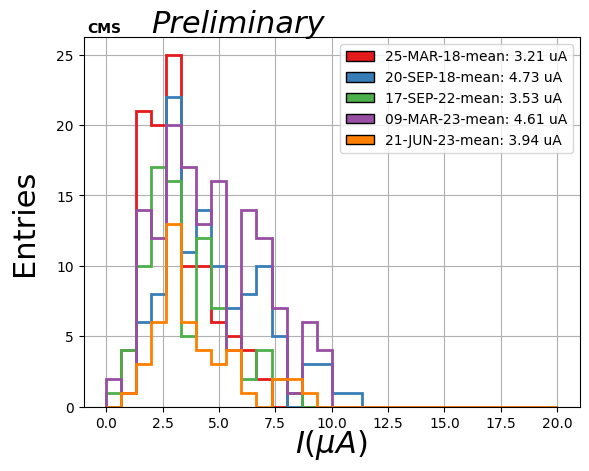

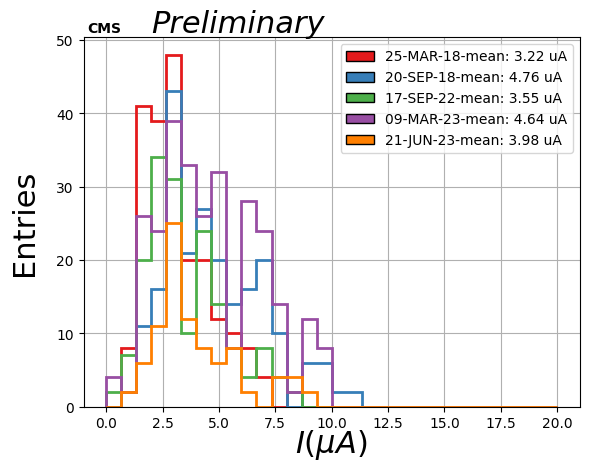

In [135]:
voltage = 7000

dates_ed = np.array(['25-MAR-18', "20-SEP-18", "17-SEP-22", "09-MAR-23", "21-JUN-23"])
RE_123 = pd.concat([select_endcap('RE+1', voltage, df_data = df_data_map1),
                    select_endcap('RE+2', voltage, df_data = df_data_map1),
                    select_endcap('RE+3', voltage, df_data = df_data_map1)],
                    ignore_index=True)

plot(RE_123, dates_ed, bins=30)


RE_123b = pd.concat([select_endcap('RE+1', voltage, df_data = df_data_map3),
                    select_endcap('RE+2', voltage, df_data = df_data_map3),
                    select_endcap('RE+3', voltage, df_data = df_data_map3)],
                    ignore_index=True)

plot(RE_123b, dates_ed, bins=30)

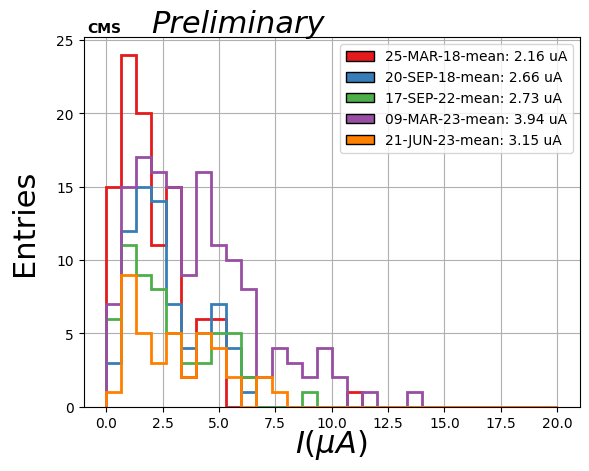

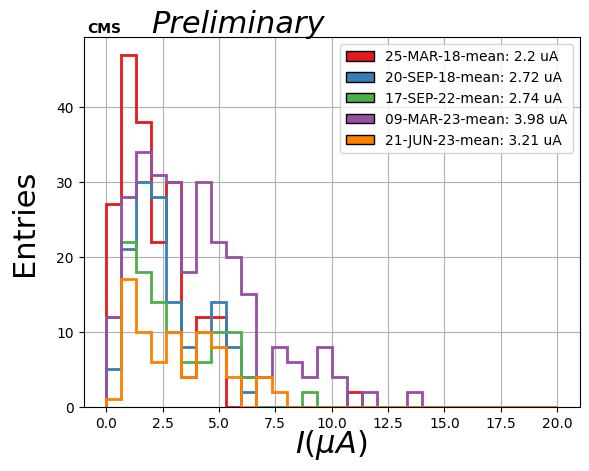

In [136]:
voltage = 7000
dates_ed = np.array(['25-MAR-18', "20-SEP-18", "17-SEP-22", "09-MAR-23", "21-JUN-23"])

RE_minus_123 = pd.concat([select_endcap('RE-1', voltage, df_data = df_data_map1),
                    select_endcap('RE-2', voltage, df_data = df_data_map1),
                    select_endcap('RE-3', voltage, df_data = df_data_map1)],
                    ignore_index=True)

plot(RE_minus_123, dates_ed, bins=30)


RE_minus_123b = pd.concat([select_endcap('RE-1', voltage, df_data = df_data_map3),
                    select_endcap('RE-2', voltage, df_data = df_data_map3),
                    select_endcap('RE-3', voltage, df_data = df_data_map3)],
                    ignore_index=True)

plot(RE_minus_123b, dates_ed, bins=30)

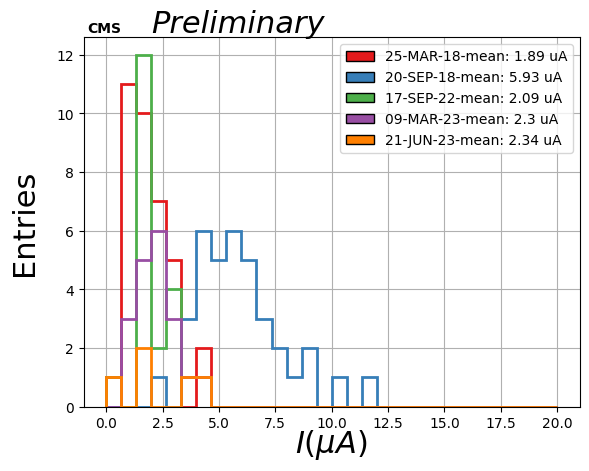

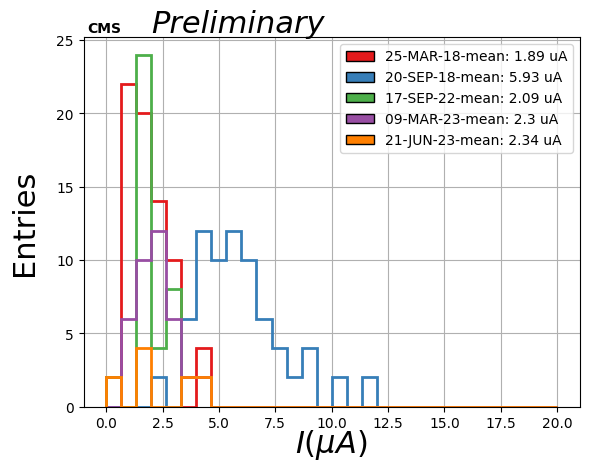

In [137]:
RE_4 = select_endcap('RE+4', voltage, df_data = df_data_map1)
plot(RE_4, dates_ed, bins=30)


RE_4b = select_endcap('RE+4', voltage, df_data = df_data_map3)
plot(RE_4b, dates_ed, bins=30)

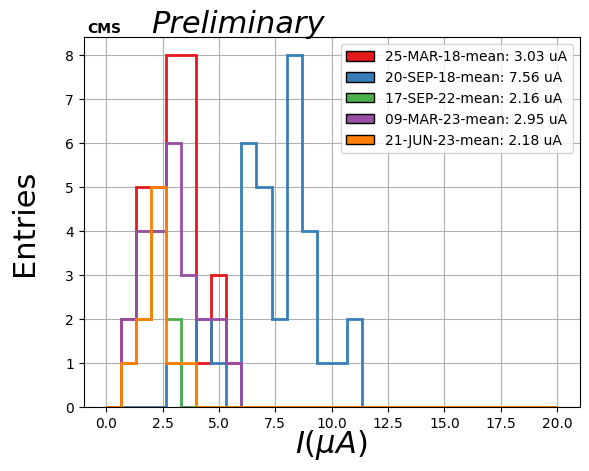

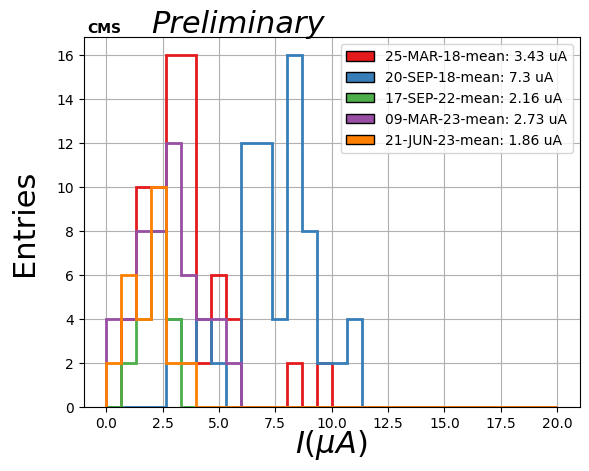

In [138]:

RE_minus_4 = select_endcap('RE-4', voltage, df_data = df_data_map1)
plot(RE_minus_4, dates_ed, bins=30)


RE_minus_4b = select_endcap('RE-4', voltage, df_data = df_data_map3)
plot(RE_minus_4b, dates_ed, bins=30)

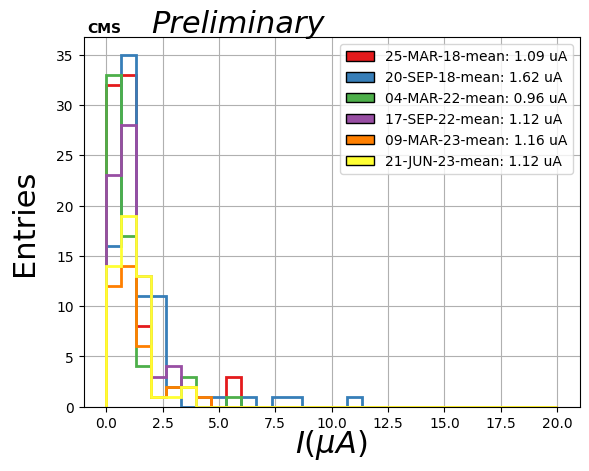

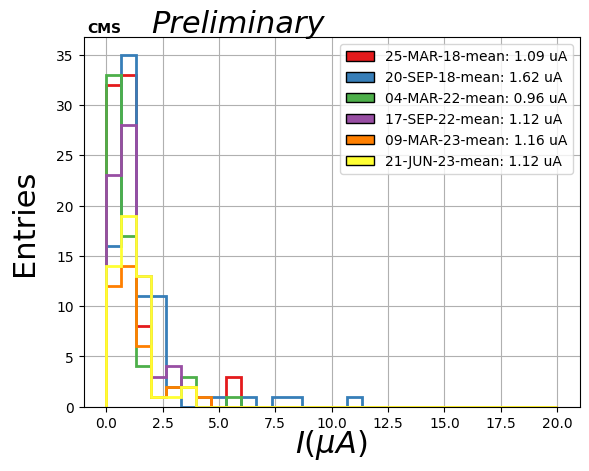

In [139]:
voltage = 7000

dates = np.array(['25-MAR-18', "20-SEP-18", "04-MAR-22", "17-SEP-22", "09-MAR-23", "21-JUN-23"])
Wminus2 = individual_wheel('W-2', voltage, df_data = df_data_map1)
plot(Wminus2, dates, bins=30)

Wminus2b = individual_wheel('W-2', voltage, df_data = df_data_map3)
plot(Wminus2b, dates, bins=30)

In [140]:
def plot_unique_chambers(region, titulo, maximo):
  n1w_m2, n1w_m2u =len(region[region['DATE'].str.find("25-MAR-18")==0]), len(region[region['DATE'].str.find("25-MAR-18")==0]["Chamber_name"].unique())
  n2w_m2, n2w_m2u = len(region[region['DATE'].str.find("20-SEP-18")==0]), len(region[region['DATE'].str.find("20-SEP-18")==0]["Chamber_name"].unique())
  n3w_m2, n3w_m2u =len(region[region['DATE'].str.find("04-MAR-22")==0]), len(region[region['DATE'].str.find("04-MAR-22")==0]["Chamber_name"].unique())
  n4w_m2, n4w_m2u =len(region[region['DATE'].str.find("17-SEP-22")==0]), len(region[region['DATE'].str.find("17-SEP-22")==0]["Chamber_name"].unique())
  n5w_m2, n5w_m2u =len(region[region['DATE'].str.find("09-MAR-23")==0]), len(region[region['DATE'].str.find("09-MAR-23")==0]["Chamber_name"].unique())
  n6w_m2, n6w_m2u =len(region[region['DATE'].str.find("21-JUN-23")==0]), len(region[region['DATE'].str.find("21-JUN-23")==0]["Chamber_name"].unique())

  group_unique = {"25-MAR-18": n1w_m2u ,"20-SEP-18" : n2w_m2u, "04-MAR-22":n3w_m2u,
          "17-SEP-22" : n4w_m2u, "09-MAR-23":n5w_m2u, "21-JUN-23": n6w_m2u}
  group = {"25-MAR-18": n1w_m2 ,"20-SEP-18" : n2w_m2, "04-MAR-22": n3w_m2,
          "17-SEP-22" : n4w_m2, "09-MAR-23":n5w_m2, "21-JUN-23": n6w_m2}

  plt.figure(figsize=(12,10))
  labels = list(group_unique.keys())
  x = np.arange(len(labels))

  values1 = list(group_unique.values())
  values2 = list(group.values())

  bar_width = 0.35

  plt.bar(x - bar_width/2, values1, bar_width, label='Chambers mapped with New function', color='b', align='edge')
  plt.bar(x + bar_width/2, values2, bar_width, label='Chambers mapped with Mapse function', color='g', align='edge')
  plt.axhline(y=maximo, color="r", label="Total Chambers", ls ="--")

  plt.title(f"Chambers analyzed in {titulo} region")
  plt.xlabel('dates')
  plt.ylabel('Entries')
  plt.xticks(x, labels, rotation=45)
  plt.legend()

  plt.show()

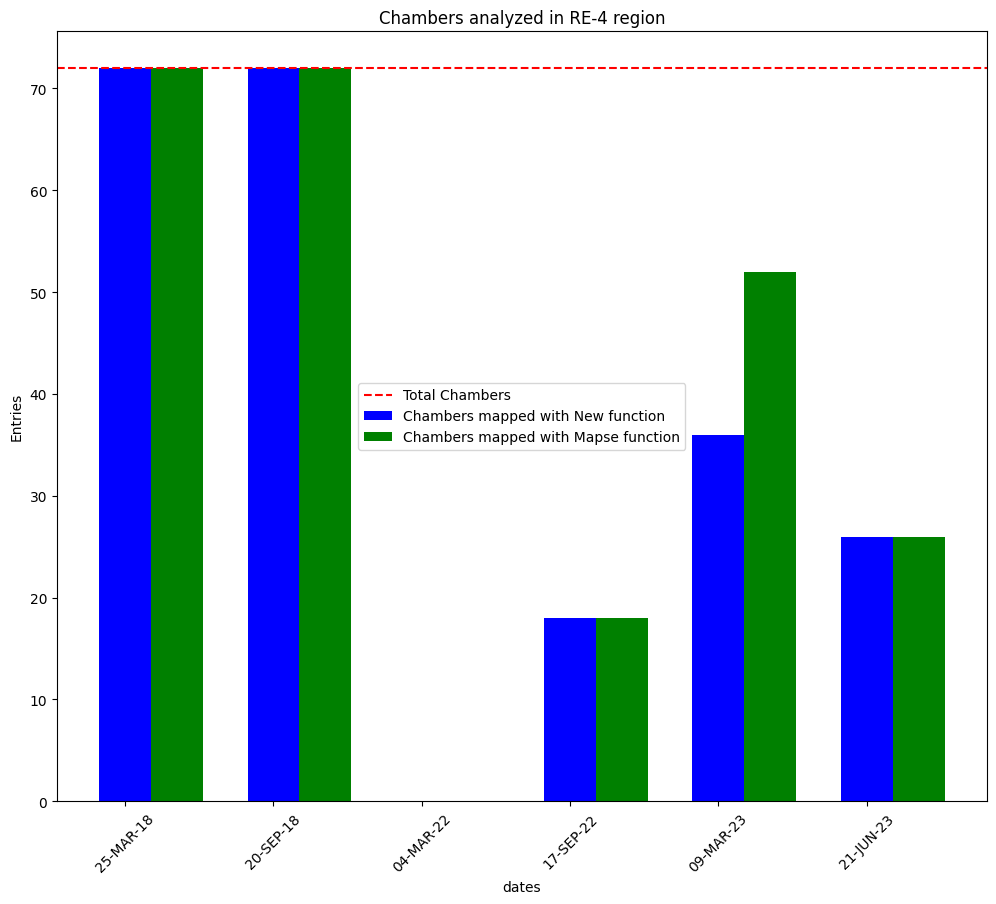

In [141]:
plot_unique_chambers(RE_minus_4b, "RE-4", 72)

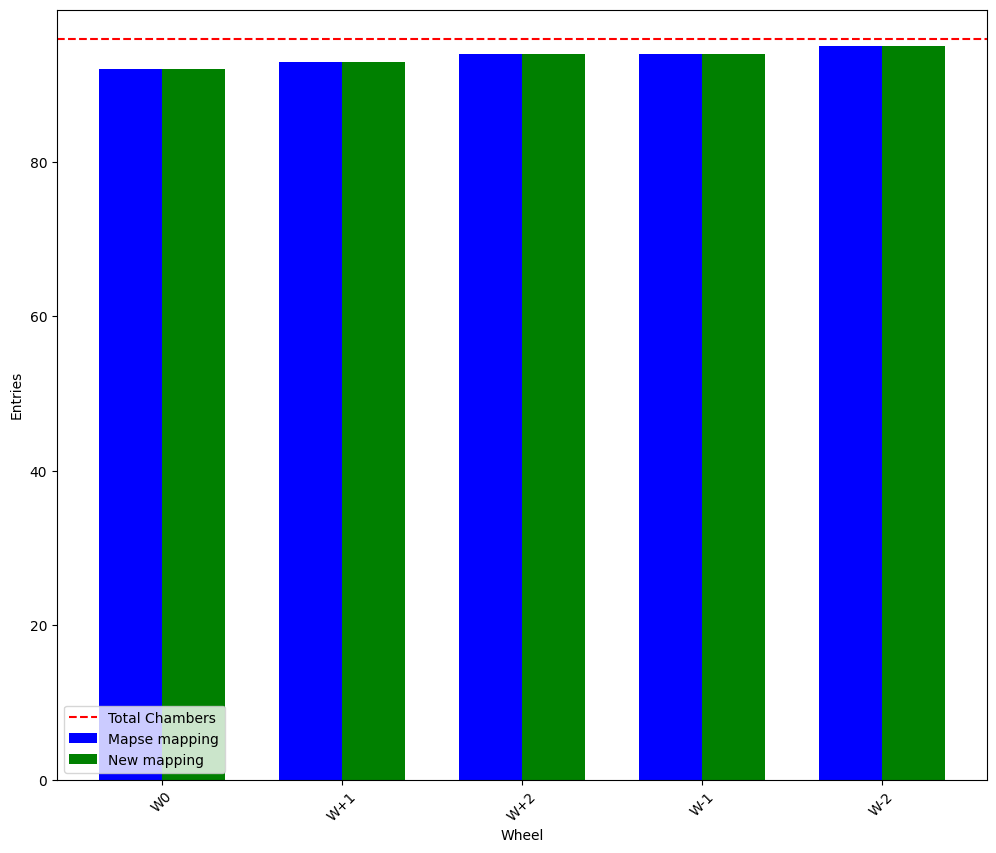

In [142]:
n1_W_plus_1 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W+1") == 0, True, False) == True]["Chamber_name"].unique())
n1_W_plus_2 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W+2") == 0, True, False) == True]["Chamber_name"].unique())
n1_W0 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W0") == 0, True, False) == True]["Chamber_name"].unique())
n1_W_minus_1 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W-1") == 0, True, False) == True]["Chamber_name"].unique())
n1_W_minus_2 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W-2") == 0, True, False) == True]["Chamber_name"].unique())


groupW1 = {"W0": n1_W0 ,"W+1" : n1_W_plus_1, "W+2":n1_W_plus_2,
         "W-1" : n1_W_minus_1, "W-2":n1_W_minus_2}

n2_W_plus_1 = len(df_data_map3[np.where(df_data_map3['Chamber_name'].str.find("W+1") == 0, True, False) == True]["Chamber_name"].unique())
n2_W_plus_2 = len(df_data_map3[np.where(df_data_map3['Chamber_name'].str.find("W+2") == 0, True, False) == True]["Chamber_name"].unique())
n2_W0 = len(df_data_map3[np.where(df_data_map3['Chamber_name'].str.find("W0") == 0, True, False) == True]["Chamber_name"].unique())
n2_W_minus_1 = len(df_data_map3[np.where(df_data_map3['Chamber_name'].str.find("W-1") == 0, True, False) == True]["Chamber_name"].unique())
n2_W_minus_2 = len(df_data_map3[np.where(df_data_map3['Chamber_name'].str.find("W-2") == 0, True, False) == True]["Chamber_name"].unique())


groupW2 = {"W0": n2_W0 ,"W+1" : n2_W_plus_1, "W+2":n2_W_plus_2,
         "W-1" : n2_W_minus_1, "W-2":n2_W_minus_2}
# Etiquetas de los grupos
plt.figure(figsize=(12,10))
labels = list(groupW1.keys())
x = np.arange(len(labels))

# Altura de las barras
values1 = list(groupW1.values())
values2 = list(groupW2.values())

# Ancho de las barras
bar_width = 0.35

# Crear un gráfico de barras para comparar los dos grupos
plt.bar(x - bar_width/2, values1, bar_width, label='Mapse mapping', color='b', align='center')
plt.bar(x + bar_width/2, values2, bar_width, label='New mapping', color='g', align='center')
plt.axhline(y=96, color="r", label="Total Chambers", ls ="--")

# Etiquetas y título
plt.xlabel('Wheel')
plt.ylabel('Entries')
#plt.title('Comparación de entradas por Wheel usando el mapeo original y el nuevo')
plt.xticks(x, labels, rotation=45)
plt.legend()

# Mostrar el gráfico
plt.show()

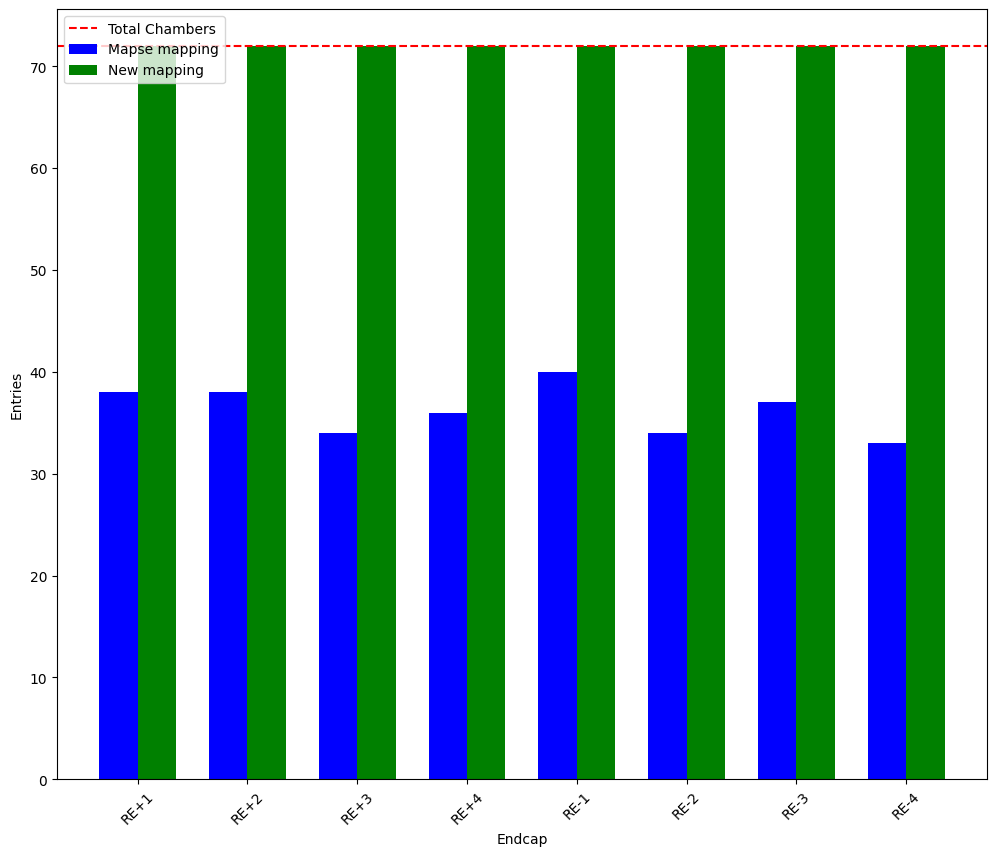

In [161]:
n1_RE_plus_1 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE+1") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_plus_2 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE+2") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_plus_3 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE+3") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_plus_4 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE+4") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_minus_1 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE-1") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_minus_2 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE-2") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_minus_3 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE-3") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_minus_4 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE-4") == 0, True, False) == True]["Chamber_name"].unique())


group1 = { "RE+1" : n1_RE_plus_1, "RE+2":n1_RE_plus_2, "RE+3":n1_RE_plus_3, "RE+4":n1_RE_plus_4,
         "RE-1" : n1_RE_minus_1, "RE-2":n1_RE_minus_2, "RE-3":n1_RE_minus_3, "RE-4":n1_RE_minus_4}

n_RE_plus_1 = len(df_data_map3[np.where(df_data_map3['Chamber_name'].str.find("RE+1") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_plus_2 = len(df_data_map3[np.where(df_data_map3['Chamber_name'].str.find("RE+2") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_plus_3 = len(df_data_map3[np.where(df_data_map3['Chamber_name'].str.find("RE+3") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_plus_4 = len(df_data_map3[np.where(df_data_map3['Chamber_name'].str.find("RE+4") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_minus_1 = len(df_data_map3[np.where(df_data_map3['Chamber_name'].str.find("RE-1") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_minus_2 = len(df_data_map3[np.where(df_data_map3['Chamber_name'].str.find("RE-2") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_minus_3 = len(df_data_map3[np.where(df_data_map3['Chamber_name'].str.find("RE-3") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_minus_4 = len(df_data_map3[np.where(df_data_map3['Chamber_name'].str.find("RE-4") == 0, True, False) == True]["Chamber_name"].unique())


group2 = { "RE+1" : n_RE_plus_1, "RE+2":n_RE_plus_2, "RE+3":n_RE_plus_3, "RE+4":n_RE_plus_4,
         "RE-1" : n_RE_minus_1, "RE-2":n_RE_minus_2, "RE-3":n_RE_minus_3, "RE-4":n_RE_minus_4}

plt.figure(figsize=(12,10))

labels = list(group1.keys())
x = np.arange(len(labels))

values1 = list(group1.values())
values2 = list(group2.values())

bar_width = 0.35

plt.bar(x - bar_width/2, values1, bar_width, label='Mapse mapping', color='b', align='center')
plt.bar(x + bar_width/2, values2, bar_width, label='New mapping', color='g', align='center')

plt.axhline(72, c="r", label="Total Chambers", ls ="--")

plt.xlabel('Endcap')
plt.ylabel('Entries')
plt.xticks(x, labels, rotation=45)
plt.legend()

plt.show()